In [156]:
#Using summary information to generate a map to plot the genome/species isolation locations
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from matplotlib.image import imread
#for saving editable svg text
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'}
mpl.rcParams.update(new_rc_params)

In [185]:
#Lat long and environment data from Table 1 in manuscript
deets = 'mb-clades-env-coords.txt'
df = pd.read_csv(deets, sep='\t', header=0)
df

,Name,Clade,Environment,Latitude,Longitude,ID
0,bohaiensis,I,sediment,36.072222,120.308333,1
1,changyiensis,I,sediment,37.132932,119.431491,2
2,daqiaonensis,I,sediment,35.989631,120.303199,3
3,fonticola,I,sediment,22.120000,119.290000,4
4,mobilis,I,sediment,20.332500,120.574722,5
5,nanhaiticus,I,sediment,19.977000,111.421000,6
6,profundi,I,sediment,-6.600000,149.800000,7
7,salicampi,I,sediment,35.680000,126.530000,8
8,segnicrescens,I,sediment,15.000000,114.000000,9
9,zhejiangensis,I,sediment,20.332500,120.574722,10


In [180]:
#Dictionary to plot points by clade number
cladeDict={'I':['red','D'],'II':['lightsalmon','s'],
            'III':['orange','o'],'IV':['gold','P'],
            'V':['teal','X'],'VI':['cyan',(4,1,45)],
            'VII':['royalblue',(4,1,0)],'VIII':['navy','^']}

#Dictionary to plot points by environment of isolation
envDict={'sediment':['brown','8'],'protist-host':['green','p'],
         'subzero brine':['orange','H'],'saltern':['gold','h'],
         'estuary':['teal','$x$'],'seawater':['aqua',(3,1,45)],
         'food':['royalblue',(5,1,45)],'pollution':['chartreuse',(7,1,45)],
         'hydrothermal vent':['white','*'], 'deep sea brine seep':['yellow','<'],
         'deep subsurface':['purple','>'],'saline lake':['pink','v'], 'hot spring':['goldenrod','d']}

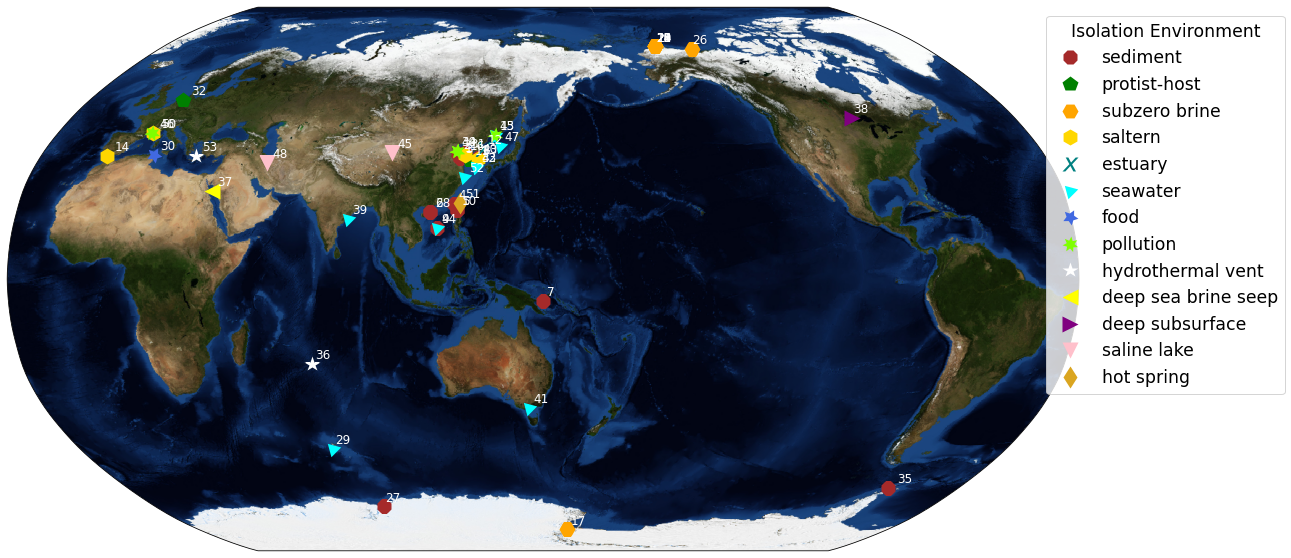

In [188]:
#Create figure and axis objects
fig = plt.figure(figsize=(20,10)) #set size
ax = plt.axes(projection=ccrs.Robinson(central_longitude=150)) #Set map projection and center longitude

#this is the map file to add
#download from https://neo.sci.gsfc.nasa.gov/view.php?datasetId=BlueMarbleNG-TB
source_proj = ccrs.PlateCarree() #set which projection the map is in by default
fname = './blue_marble/BlueMarbleNG-TB_2004-05-01_rgb_1440x720.TIFF' #map file
ax.imshow(imread(fname), origin='upper', transform=source_proj) #image reader that takes map file, creates transformable object, and adds to axis

#iteratively add points to map based on isolation environment dictionary
for key in envDict.keys():
    ax.plot(df[df.Environment==key].Longitude,df[df.Environment==key].Latitude,marker=envDict[key][1], #lat, long, and marker style from dict
            markeredgecolor='None',markerfacecolor=envDict[key][0],markersize=16, #setting marker color and size
            linewidth=0.0, transform=ccrs.Geodetic()) #prevent lines connecting points from showing and describe projection that data originally works in
    
plt.legend(envDict.keys(),fontsize='xx-large',title='Isolation Environment',title_fontsize='xx-large', #create legend
          loc='upper right', bbox_to_anchor=(1.2, 1)) #set legend location

for line in range(0,df.shape[0]): #add ID numbers to each dot on map (adjust manually in Inkscape)
     ax.text(df.Longitude[line]+1.5, df.Latitude[line]+1.5, #setting location for text box for each dot in the plot
     df.ID[line], horizontalalignment='left', rotation=0, #getting Genome name for each dot and filling text box; also setting relative position and rotation of text
     size=12, color='white', weight='light', transform=ccrs.Geodetic()) #setting text size and color

plt.show() #display map or optionally save as svg
#plt.savefig('fig_editing/mbpan_world_map_env-spp_v2.svg',dpi=300,format='svg')

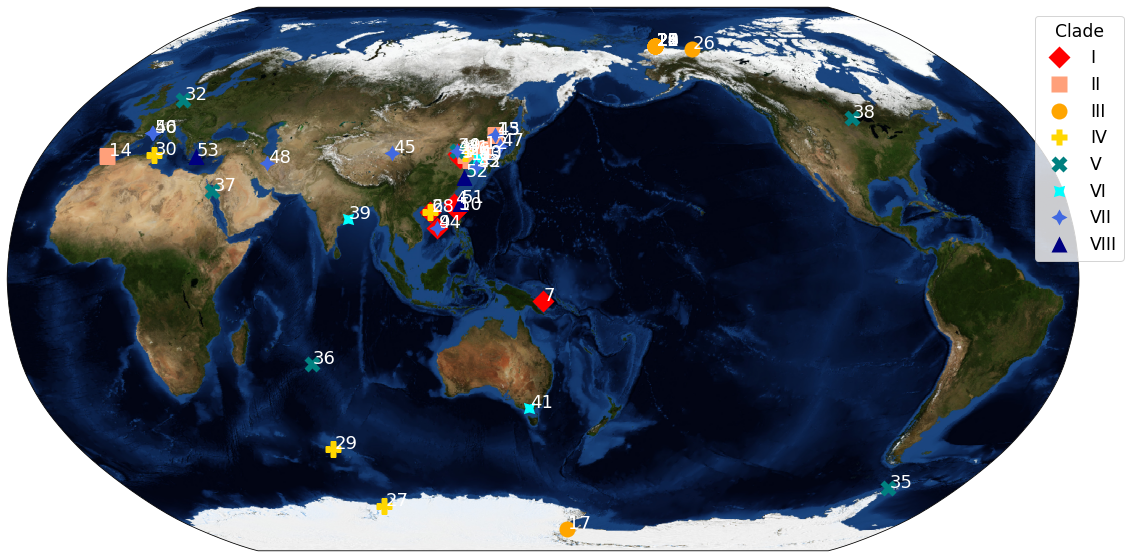

In [186]:
#Same figure generation as above but with Clades labelled rather than environment
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=150))

source_proj = ccrs.PlateCarree()
fname = './blue_marble/BlueMarbleNG-TB_2004-05-01_rgb_1440x720.TIFF'
ax.imshow(imread(fname), origin='upper', transform=source_proj)

for key in cladeDict.keys():
    ax.plot(df[df.Clade==key].Longitude,df[df.Clade==key].Latitude,marker=cladeDict[key][1],
            markeredgecolor='None',markerfacecolor=cladeDict[key][0],markersize=16,
            linewidth=0.0, transform=ccrs.Geodetic())
    
plt.legend(cladeDict.keys(),fontsize='xx-large',title='Clade',title_fontsize='xx-large',
          loc='upper right', bbox_to_anchor=(1.05, 1))

for line in range(0,df.shape[0]):
     ax.text(df.Longitude[line]+0.5, df.Latitude[line], #setting location for text box for each dot in the plot
     df.ID[line], horizontalalignment='left', rotation=0, #getting Genome name for each dot and filling text box; also setting relative position and rotation of text
     size=18, color='white', weight='light', transform=ccrs.Geodetic()) #setting text size and color

plt.show()
#plt.savefig('fig_editing/mbpan_world_map_clade.svg',dpi=300,format='svg')